In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

# Uses raw data
matdata = loadmat("../Data/SpineMidData_21032018.mat")
spineMidData=matdata['SpineMidData']

# Uses preprocessed csv data
csvdata = csv.reader(open('../Data/preprocessed_SpineMidData_withStringCols.csv', 'r'), delimiter=',')

FileNotFoundError: [Errno 2] No such file or directory: '../Data/SpineMidData_21032018.mat'

In [ ]:
#Seperate ID's into different parts, i.e ID, A or B, segment
usableID = []

# For CSV data
csvdata = csv.reader(open('../Data/preprocessed_alcoholdata_sl_std.csv', 'r'), delimiter=',')

# Make a list of the ID's in the processed data file
for row in csvdata:
    nmbrsL = row[1]
    nmbrsL = nmbrsL[:-1]
    usableID.append(nmbrsL)

usableID.pop(0)
print(usableID)

In [62]:
count = 0
for ID in usableID:
    nmbrs = list(ID)
    nmbrs[0:3] = [''.join(nmbrs[0:3])]
    print(nmbrs)
    print(count)
    count += 1

['006', 'A', '0', '1']
0
['006', 'A', '0', '1']
1
['006', 'A', '0', '1']
2
['006', 'A', '0', '1']
3
['009', 'A', '0', '1']
4
['009', 'A', '0', '1']
5
['009', 'A', '0', '1']
6
['009', 'A', '0', '1']
7
['010', 'A', '0', '1']
8
['010', 'A', '0', '1']
9
['010', 'A', '0', '1']
10
['010', 'A', '0', '1']
11
['011', 'A', '0', '1']
12
['011', 'A', '0', '1']
13
['011', 'A', '0', '1']
14
['011', 'A', '0', '1']
15
['013', 'A', '0', '1']
16
['013', 'A', '0', '1']
17
['013', 'A', '0', '1']
18
['013', 'A', '0', '1']
19
['014', 'A', '0', '1']
20
['014', 'A', '0', '1']
21
['014', 'A', '0', '1']
22
['014', 'A', '0', '1']
23
['015', 'A', '0', '1']
24
['015', 'A', '0', '1']
25
['015', 'A', '0', '1']
26
['015', 'A', '0', '1']
27
['016', 'A', '0', '1']
28
['016', 'A', '0', '1']
29
['016', 'A', '0', '1']
30
['016', 'A', '0', '1']
31
['017', 'A', '0', '1']
32
['017', 'A', '0', '1']
33
['017', 'A', '0', '1']
34
['017', 'A', '0', '1']
35
['018', 'A', '0', '1']
36
['018', 'A', '0', '1']
37
['018', 'A', '0', '1']

1166
['196', 'B', '0', '1']
1167
['197', 'B', '0', '1']
1168
['197', 'B', '0', '1']
1169
['197', 'B', '0', '1']
1170
['197', 'B', '0', '1']
1171
['198', 'B', '0', '1']
1172
['198', 'B', '0', '1']
1173
['198', 'B', '0', '1']
1174
['198', 'B', '0', '1']
1175
['199', 'B', '0', '1']
1176
['199', 'B', '0', '1']
1177
['199', 'B', '0', '1']
1178
['199', 'B', '0', '1']
1179
['200', 'B', '0', '1']
1180
['200', 'B', '0', '1']
1181
['200', 'B', '0', '1']
1182
['200', 'B', '0', '1']
1183
['201', 'B', '0', '1']
1184
['201', 'B', '0', '1']
1185
['201', 'B', '0', '1']
1186
['201', 'B', '0', '1']
1187
['202', 'B', '0', '1']
1188
['202', 'B', '0', '1']
1189
['202', 'B', '0', '1']
1190
['202', 'B', '0', '1']
1191
['203', 'B', '0', '1']
1192
['203', 'B', '0', '1']
1193
['203', 'B', '0', '1']
1194
['203', 'B', '0', '1']
1195
['204', 'B', '0', '1']
1196
['204', 'B', '0', '1']
1197
['204', 'B', '0', '1']
1198
['204', 'B', '0', '1']
1199
['205', 'B', '0', '1']
1200
['205', 'B', '0', '1']
1201
['205', 'B', '0

In [77]:
# Crossreference the data file with the usable'ID, to select the right data entries


print(spineMidData[:,1].size)

usableList = []

for i in range(spineMidData[:,0].size):
    ID = spineMidData[i,0]
    if ID[0] in usableID:
        usableList.append(spineMidData[i,:])

usableData = np.array(usableList)


1663


1232


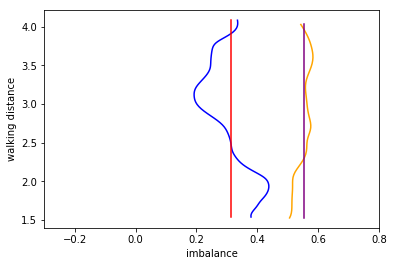

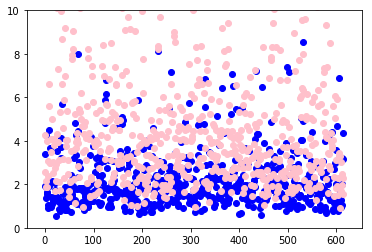

In [106]:

segmData = 7
print(usableData[:,1].size)
Bstart = 616


distances = []
distancesGl = []

for i in range(Bstart):

    walk = usableData[i, segmData]
    #print(walk)
    
    x = walk[:,0]
    y = walk[:,1]
    z = walk[:,2]
    
    glasses = usableData[i+Bstart, segmData]
    
    xgl = glasses[:,0]
    ygl = glasses[:,1]
    zgl = glasses[:,2]
    
    
    
    average = np.average(x)
    averageArr = np.full((z.size), average)
     
    averageGL = np.average(xgl)
    averageGLArr = np.full((zgl.size), averageGL)
    
    if i is 55:
        plt.plot(x, z, color='orange')
        plt.plot(averageArr, z, color='purple')
        plt.plot(xgl,zgl, color='blue')
        plt.plot(averageGLArr, zgl, color='red')
        plt.xlim(-0.3, 0.8)
        plt.xlabel('imbalance')
        plt.ylabel('walking distance')
        plt.savefig('projection.png')
        plt.show()
    
    dTotal = 0
    dGlTotal = 0
    
    for h in x:
        d = average - h
        if d < 0:
            d = -d
        dTotal += d
    distances.append(dTotal[0,0])
        
    for j in xgl:
        d = averageGL - j
        if d < 0:
            d = -d
        dGlTotal += d
    distancesGl.append(dGlTotal[0,0])
    
    
    
    
xaxis = np.arange(len(distances))

plt.scatter(xaxis, distances, color='blue')
plt.scatter(xaxis, distancesGl, color='pink')
plt.ylim(0, 10)
plt.savefig('distances.png')
plt.show()

In [2]:

distances = []

for i in range(usableData[:,1].size):
    
    walk = usableData[i, segmData]
    
    x = walk[:,0]
    y = walk[:,1]
    z = walk[:,2]
    
    dTotal = 0
    dGlTotal = 0,.
    
    for h in x:
        d = average - h
        if d < 0:
            d = -d
        dTotal += d
    distances.append(dTotal[0,0])
    
d_array = np.array(distances)


    
    

SyntaxError: invalid syntax (<ipython-input-2-86ab75a421ca>, line 13)

In [3]:
df_data = pd.read_csv("../Data/preprocessed_alcoholdata_sl_std.csv")
df_data = df_data.drop("Unnamed: 0", axis=1)

col = pd.Series(d_array)
df_data["SumDistance"] = col.values

df_data.to_csv(path_or_buf="../Data/preprocessed_alcoholdata_sl_std_sd.csv")

   

NameError: name 'd_array' is not defined